In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from galpy import potential
from galpy.util import bovy_plot
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,
                     xtick_labelsize=15.,ytick_labelsize=15.)

# Question 1

# a)

$c=r_{vir}/a$

Substituting $\alpha$=1 and $\beta$=3 into Eqn.(3.41) of the notes gives us the density profile for the NFW potential.

\begin{align}
\rho(r)=\frac{\rho_0 a}{r(1+r/a)^2}
\end{align}

substituting $r=r_{vir}$ and $a=r_{vir}/c$ gives,

\begin{align}
\rho(r_{vir})=\frac{\rho_0 (r_{vir}/c)}{r_{vir}(1+r_{vir}/a)^2}=\frac{\rho_0}{c(1+c)^2}&=\Delta_h\bar{\rho} \\
&=\Delta_h\rho_{crit}\Omega_m \\
&=\Delta_h\Omega_m\frac{3H^2}{8\pi G}
\end{align}

Solving for $\rho_0$ gives,

$$\rho_0=c(1+c)^2\Delta_h\Omega_m\frac{3H^2}{8\pi G}$$

Now Eqn.(3.43) of the notes gives the enclosed mass for NFW potential. Substituting $r=r_{vir}$ and replacing $c=r_{vir}/a$ and $a=r_{vir}/c$ gives,

$$M(<r_{vir})=4\pi\rho_0\big(\frac{r_{vir}}{c}\big)^3\Big(ln(1+c)-\frac{c}{1+c}\Big)$$

Isolating for $r_{vir}$ leaves us with the expression,

$$r_{vir}=\Big[\frac{c^3M(<r_{vir})}{4\pi\rho_0}\big(\frac{1}{ln(1+c)-\frac{c}{1+c}}\big)\Big]^{1/3}$$

Thus we can solve for $r_{vir}$ by first solving for $\rho_0$ and substiting that value into the expression above. 


In [2]:
H=70.
omega=0.3
delta=200.
c=12.
Mvir=10e12
G=6.754e-11
rho_crit=10e-26

#rho=(c*(1+c)**2)*(delta*omega*3*H**2)/(8*np.pi*G)
rho=(c*(1+c)**2)*(delta*omega*rho_crit)

rvir=(((c**3*Mvir)/(4*np.pi*rho))*(1/(np.log(1+c)-c/(1+c))))**(1/3)

print ('The virial radius is %.e4' %rvir)

h=(70/3.086e19)

print ((3*h**2)/(8*np.pi*G))



The virial radius is 4e+114
9.093363987785747e-27


# b)

Given that we have an expression for $r_{vir}$ in terms of the $M(<r_{vir})$ we would like to rewrite Eqn.(3.43) in terms of $r_{vir}$,

This can be done by subtituting $a=r_{vir}/c$ and $r/a=rc/r_{vir}$,

$$M(<r)=4\pi\rho_0\big(\frac{r_{vir}}{c}\big)^3\Big(ln(1+rc/r_{vir})-\frac{rc/r_{vir}}{1+rc/r_{vir}}\Big)$$

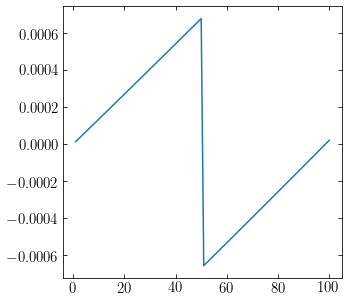

In [3]:
Mvir=10e10
r=np.linspace(1,100,100)
Menc=4*np.pi*rho*(rvir/c)**3*(np.log(1+r*c/rvir)-((r*c/rvir)/(1+r*c/rvir)))

Menc.shape

plt.plot(r,Menc)

# Question 2
# a)

The Kuzmin disk has the property that its potential can be reconstructed by 2 point mass potentials. Specifically, the potential in the region of space at z<0 is equivalent to the potential created in that region for a point mass at z=a (where a is the scale factor of the kuzmin disk). By symmetry the equivalent statement can be made for the region z>0. Therefore we can recreate the kuzmin potential using 2 point mass potentials placed at z={-a,a}. But a point mass potential is spherically symmetric so projected into the (x,z) plane of the Kuzmin disk will result in (semi)circles as the contours of the Kuzmin disk. This is shown below.     

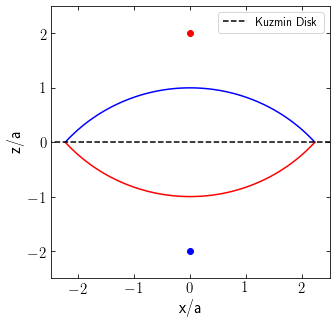

In [4]:
x=np.linspace(-np.sqrt(5),np.sqrt(5),100)
z_top=(-4+np.sqrt(16-4*(x**2-5)))/2
z_bot=(4-np.sqrt(16-4*(x**2-5)))/2

plt.plot(x,z_top, 'b')
plt.plot(x,z_bot, 'r')
plt.scatter(x=0,y=-2,color='b')
plt.scatter(x=0,y=2,color='r')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.axhline(y=0, xmin=-2.5, xmax=2.5,ls='--',color='k', label='Kuzmin Disk')
plt.xlabel('x/a')
plt.ylabel('z/a')
plt.legend()



['BurkertPotential', 'CosmphiDiskPotential', 'DehnenBarPotential', 'DehnenSmoothWrapperPotential', 'DiskSCFPotential', 'DoubleExponentialDiskPotential', 'EllipticalDiskPotential', 'FerrersPotential', 'FlattenedPowerPotential', 'HernquistPotential', 'InterpSnapshotRZPotential', 'IsochronePotential', 'JaffePotential', 'KGPotential', 'KeplerPotential', 'KuzminDiskPotential', 'KuzminKutuzovStaeckelPotential', 'LogarithmicHaloPotential', 'LopsidedDiskPotential', 'MN3ExponentialDiskPotential', 'MWPotential', 'MWPotential2014', 'MiyamotoNagaiPotential', 'MovingObjectPotential', 'NFWPotential', 'PlummerPotential', 'Potential', 'PotentialError', 'PowerSphericalPotential', 'PowerSphericalPotentialwCutoff', 'PseudoIsothermalPotential', 'RZToplanarPotential', 'RZToverticalPotential', 'RazorThinExponentialDiskPotential', 'SCFPotential', 'SnapshotRZPotential', 'SoftenedNeedleBarPotential', 'SolidBodyRotationWrapperPotential', 'SpiralArmsPotential', 'SteadyLogSpiralPotential', 'TransientLogSpiralPote

<function matplotlib.pyplot.show>

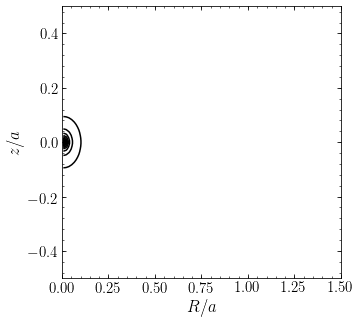

In [5]:
import galpy.potential
print([p for p in dir(galpy.potential) if 'Potential' in p])

kp=potential.KeplerPotential(amp=1.)
kp.plot(justcontours=True,nrs=100,nzs=100)
plt.xlabel(r'$R/a$')
plt.ylabel(r'$z/a$')
plt.show


# b)

\begin{equation}
\begin{split}
R^2+(|z|^2+\Delta^2)&=R^2+|z|^2+\Delta^2+2|z|\Delta \\
& =\Delta^2sinh^2(u)sin^2(v)+\Delta^2cosh^2(u)cos^2(v)+\Delta^2+2\Delta^2cosh(u)cos(v) \\
\mbox{substiting $sinh^2(v)=cosh^2(v)-1$ gives,} \\
& =\Delta^2\big(cosh^2(u)*(sin^2(v)+cos^2(v))-sin^2(v)+1+2cosh(u)cos(v)\big) \\
\mbox{using $sin^2(v)+cos^2(v)=1$ this simplies to,} \\
& =\Delta^2\big(cosh^2(u)+cos^2(v)+2cosh(u)cos(v)\big) \\
& =\Delta^2\big(cosh(u)+|cos(v)|\big)^2
\end{split}
\end{equation}

# c)

The Kuzmin disk potential can be expressed as,

$$\Phi(R,z)=\frac{-GM}{\sqrt{R^2(|z|+a)^2}}$$

replacing $R^2(|z|+\Delta)^2=\Delta^2(cosh(u)+|sin(v)|)^2$ gives us,

\begin{align}
\Phi(u,v)&=\frac{-GM}{\Delta(cosh(u)+cos(v))} \\
& =\frac{-GM}{\Delta(cosh(u)+|cos(v)|)} \frac{cosh(u)-|cos(v)|}{cosh(u)-|cos(v)|} \\
& =\frac{-GM}{\Delta(cosh^2(u)-|cos^2(v)|)}(cosh(u)-|cos(v)|)
\end{align}

Now, $cosh^2(u)-cos^2(v)=sinh^2(u)+sin^2(v)$ so,

\begin{align}
\Phi(u,v)=\frac{-GM}{\Delta}\frac{cosh^2(u)-|cos(v)|}{sinh^2(u)+sin^2(v)}
\end{align}

choosing $\Delta=a$ gives us the final form,

\begin{align}
\Phi(u,v)=\frac{-GM}{a}\frac{cosh^2(u)-|cos(v)|}{sinh^2(u)+sin^2(v)}
\end{align}

# d)

First recall in cyclindrical coordinates we have,
$\mathcal{L}(R,\phi,z,\dot{R},\dot{\phi},\dot{z})=\frac{1}{2}\big(\dot{R}^2+[R\dot\phi]^2+\dot{z}^2\big)-\Phi_{kuzmin}(R,z)$

which can be written as,

$\mathcal{L}(R,\phi,z,\dot{R},\dot{\phi},\dot{z})=\frac{1}{2}\big(\dot{R}^2+\dot{z}^2\big)-\Phi_{eff}(R,z;L_z)$

Now, 

$\dot{R}=\Delta\big(\dot{u}cosh(u)sin(v)+\dot{v}sinh(u)cos(v)\big)$

$\dot{z}=\Delta\big(\dot{u}sinh(u)cos(v)+\dot{v}cosh(u)sin(v)\big)$

Substituing this into $\mathcal{L}$ and simplifying we have,

$\mathcal{L}(u,v,\dot{u},\dot{v})=\frac{\Delta^2}{2}\big(\dot{u}^2cosh^2(u)sin^2(u)+\dot{v}^2sinh^2(u)cos^2(v)+\dot{u}^2sinh^2(u)cos^2(v)+\dot{v}^2cosh^2(u)sin^2(v)\big)+\frac{GM}{a}\frac{cosh(u)-|cos(v)|}{sinh^2(u)+sin^2(v)}-\frac{L_z^2}{2\Delta^2sinh^2(u)sin^2(v)}$

using the identities $sin^2(v)+cos^2(v)=1$ and $cosh^2(u)-sinh^2(u)=1$ we can simplify,

$\mathcal{L}(u,v,\dot{u},\dot{v})=\frac{\Delta}{2}(\dot{u}^2+\dot{v}^2)\big(cosh^2(u)sin^2(v)+sinh^2(u)cos^2(v)\big)$

$\qquad\qquad=\frac{\Delta}{2}(\dot{u}^2+\dot{v}^2)\big(sinh^2(u)+sin^2(v)\big)$

$P_u=\frac{d\mathcal{L}}{d\dot{u}}=\Delta^2(sinh^2(u)+sin^2(v))\dot{u}$

$P_v=\frac{d\mathcal{L}}{d\dot{v}}=\Delta^2(sinh^2(u)+sin^2(v))\dot{v}$

Isolating for $\dot{u}$ and $\dot{v}$,

$\dot{u}=\frac{P_u}{\Delta^2(sinh^2(u)+sin^2(v))}$

$\dot{v}=\frac{P_v}{\Delta^2(sinh^2(u)+sin^2(v))}$

we can substitute this into our our previous equations for $\dot{R}$ and $\dot{z}$ giving,

$$P_R=\dot{R}=\Delta\bigg(\frac{P_ucosh(u)sin(v)}{\Delta^2(sinh^2(u)+sin^2(v))}+\frac{P_vsinh(u)cos(v)}{\Delta^2(sinh^2(u)+sin^2(v))}\bigg)$$

$$P_z=\dot{z}=\Delta\bigg(\frac{P_usinh(u)cos(v)}{\Delta^2(sinh^2(u)+sin^2(v))}+\frac{P_vcosh(u)sin(v)}{\Delta^2(sinh^2(u)+sin^2(v))}\bigg)$$

Now isolating for $P_v$ using the expression for $P_R$ gives,

$$P_v=\frac{\Delta P_R(sinh^2(u)+sin^2(v))-P_ucosh(u)sin(v)}{sinh(u)cos(v)}$$

Likewise isolating for $P_u$ using the expression for $P_z$ gives,

$$P_u=\frac{\Delta P_z(sinh^2(u)+sin^2(v))-P_vcosh(u)sin(v)}{sinh(u)cos(v)}$$

substituting $P_v$ into $P_u$ gives,

\begin{align}
P_u=&\frac{\Delta P_z(sinh^2(u)+sin^2(v))}{sinh(u)cos(v)}-\frac{cosh(u)sin(v)}{sinh^2(u)cos^2(v)}\bigg(\Delta P_R(sinh^2(u)+sin^2(v))-P_u(cosh(u)sin(v)\bigg) \\
& \implies P_u(1-\frac{tan^2(v)}{tanh^2(u)})=\Delta(sinh^2(u)+sin^2(v))\bigg(\frac{P_z}{sinh(u)cos(v)}-\frac{P_Rtan(v)}{sinh(u)cos(v)tanh(u)}\bigg) \\
& P_u=\Delta\bigg(\frac{sinh^2(u)+sin^2(v)}{tanh^2(u)-tan^2(v)}\bigg)\bigg(\frac{P_ztanh(u)}{cosh(u)cos(v)}-\frac{P_Rtan(v)}{cosh(u)cos(v)}\bigg)
\end{align}

Now we could substitute this back into our expression for $P_v$ and do a lot of algebra or we could observe the symmtery in the two expressions for $P_R$ and $P_z$. Specifically replacing $P_R$ with $P_z$ and noting that unlike $P_u \propto P_z$ $P_v \propto -P_z$. Making these substitutions gives the expression for $P_v$,

\begin{align}
P_v=\Delta\bigg(\frac{sinh^2(u)+sin^2(v)}{tanh^2(u)-tan^2(v)}\bigg)\bigg(\frac{P_ztan(u)}{cosh(u)cos(v)}+\frac{P_Rtanh(v)}{cosh(u)cos(v)}\bigg)
\end{align}



# e)

\begin{equation}
\begin{split}
\mathcal{H}&=\sum_i q_i \frac{\partial\mathcal{L}}{\partial\dot{q}}-\mathcal{L} \\
& =\dot{u} \frac{\partial\mathcal{L}}{\partial\dot{u}} +\dot{v}\frac{\partial\mathcal{L}}{\partial\dot{v}}-\mathcal{L} \\
& =\frac{\Delta^2}{2}(\dot{u}^2+\dot{v}^2)\big(sinh^2(u)+sin^2(v)\big)-\frac{GM}{a}\frac{cosh(u)-|cos(v)|}{sinh^2(u)+sin^2(v)}+\frac{L_z^2}{2\Delta^2sinh^2(u)sin^2(v)} \\
\mbox{which can be cleaned up,}\\
& =\frac{P_u^2+P_v^2}{2\Delta^2(sinh^2(u)+sin^2(v))}+\Phi_{eff}(u,v;L_z) \\
\end{split}
\end{equation}

The above expression has no explicit dependence on time and so is a constant of motion along with the $L_z$ angular momentum already assumed to be a constant of motion for this potential given symmetry of the potential in the azimuthal direction. In fact given the expression for $P_u$ and $P_v$ in part (d) we see that the first couple terms decribe the kinetic energy in transformed coordinates u,v and so $\mathcal{H}$=E. 

Therefore, multiplying the expression for $\mathcal{H}$ by the factor $2\Delta^2(sinh^2(u)+sin^2(v))$ gives, 

$2\Delta^2(sinh^2(u)+sin^2(v))E=P_u^2+P_v^2-\frac{2GM}{a}\Delta^2(cosh(u)-|cos(v)|)+\frac{L_z^2(sinh^2(u)+sin^2(v))}{sinh^2(u)sin^2(v)}$

$2\Delta^2\big(Esinh^2(u)+\frac{GM}{a}cosh(u)\big)-P_u^2-\frac{L_z^2}{sinh^2(u)}=\frac{L_z^2}{sinh^2(u)}+P_v^2-2\Delta^2\big(Esin^2(v)-\frac{GM}{a}|cos(v)|\big)$



# f)

we would like to transform coordinates from (R,z) $\rightarrow$ (u,v),

First, observe that 

$$R^2=\Delta^2sinh^2(u)sin^2(v)=\Delta^2sinh^2(u)(1-cos^2(v)) \implies cos^2(v)=1-\frac{R^2}{\Delta^2sinh^2(u)}$$
$$z^2=\Delta^2cosh^2(u)cos^2(v)$$

substituting expression for $cos^2(v)$ into $z^2$ allows us to separate variables,

\begin{align}
z^2 &=\Delta^2cosh^2(u)\bigg(1-\frac{R^2}{\Delta^2sinh^2(u)}\bigg) \\
z^2&=\frac{\Delta^2cosh^2(u)sinh^2(u)-R^2cosh^2(u)}{sinh^2(u)}
\end{align}

Now let replace $sinh^2(u)$ with $cosh^2(u)-1$ giving,

\begin{align}
\Delta^2cosh^4(u)+(-z^2-\Delta^2-R^2)cosh^2(u)+z^2=0
\end{align}

now we can solve for $cosh^2(u)$ using the quadratic equation. setting $x=cosh^2(u)$ in the quad equation gives,

$$cosh^2(u)=\frac{z^2+\Delta^2+R^2+\sqrt{(z^2+\Delta^2+R^2)^2-4(\Delta^2+z^2)}}{2\Delta^2}$$

Therefore, 

$$u=arccosh\bigg(\sqrt{\frac{z^2+\Delta^2+R^2+\sqrt{(z^2+\Delta^2+R^2)^2-4(\Delta^2+z^2)}}{2\Delta^2}}\bigg)$$

Now we just need an expression for v,

$$R^2=\Delta^2sinh^2(u)sin^2(v) \implies v=arcsin\bigg(\frac{R}{\Delta sinh(u)}\bigg)$$


# f) Revised

NOTE: The method above didn't give the correct transformed u,v coordinates so I'm applying a trick here suggested in the email you sent. 

First, observe that,

\begin{align}
\sqrt{R^2-(|z|+\Delta)^2}&=R^2+|z|^2-2|z|\Delta \\
&= 
\end{align}



In [6]:
from galpy import potential
from galpy.orbit import Orbit

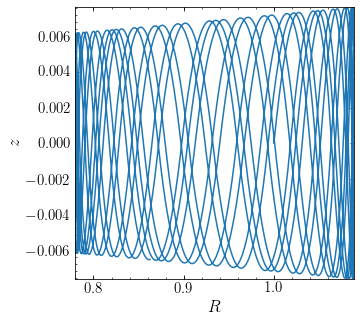

In [7]:
kzp= potential.KuzminDiskPotential(amp=1.8,a=0.7)
o= Orbit(vxvv=[1.,0.2,0.9,0.,0.1,0.])
ts= np.linspace(0,20,10001)
o.integrate(ts,kzp, dt=0.000001)
o.plot()

In [8]:
R=o.R(ts)
z=o.z(ts)
a=0.7

test=(z**2+a**2+R**2+np.sqrt((z**2+a**2+R**2)**2+4*(a**2+z**2))/2*a*2)
test2=(z**2+a**2+R**2)**2+4*(a**2+z**2)

print (test2)
u=np.arccosh(np.sqrt(z**2+a**2+R**2+np.sqrt((z**2+a**2+R**2)**2-4*(a**2+z**2))/2*a*2))
v=np.arcsin(R/(a*np.sinh(u)))
            

[ 4.1801      4.18248325  4.18486496 ...,  3.47947109  3.48138275
  3.48329874]
/Users/ryanmckinven/anaconda/envs/galdyncourse/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':

/Users/ryanmckinven/anaconda/envs/galdyncourse/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arcsin
  # Remove the CWD from sys.path while we load stuff.

